In [ ]:
from os import listdir
from matplotlib import image
# On suppose que la base d'images est dans le dossier "CBIR_DataSet/obj_decoys" sur votre Google Drive

# Charger Drive dans Colab
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dimensions de l'image : (337, 336)


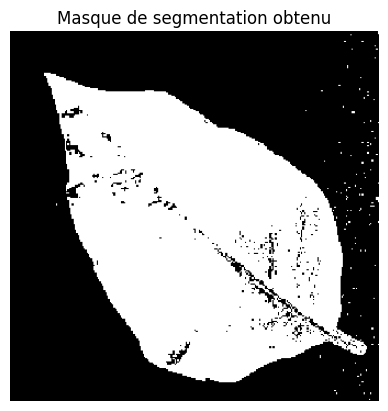

In [ ]:
import cv2 as cv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image_path = "/content/drive/MyDrive/Image_clustering (1)/1.bmp"
image = cv.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
  print(f"Error: Could not load image from {image_path}. Please check the path and permissions.")
else:
  img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
  print("Dimensions de l'image :", img.shape)

  # Aplatir l'image 2D => 1D
  img_reshape = img.reshape((-1, 1))

  # Appliquer K-means
  k = 2
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(img_reshape)
  labels = kmeans.labels_

  # Reconstruire le masque de segmentation 2D
  mask = labels.reshape(img.shape)

  # Afficher le masque de segmentation obtenu
  plt.imshow(mask, cmap='gray')
  plt.title('Masque de segmentation obtenu')
  plt.axis('off')
  plt.show()

(337, 336, 3)


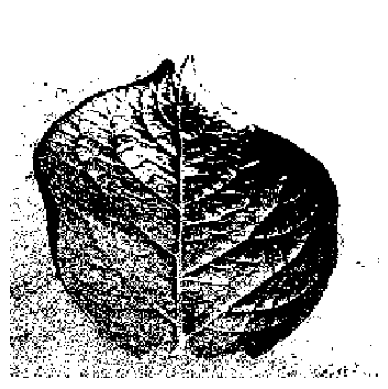

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Chemin de l'image
image_path = "/content/drive/MyDrive/Image_clustering (1)/2.bmp"

# Lire l'image
image = cv.imread(image_path)

# Vérifier les dimensions de l'image
print(image.shape)

# Appliquer une conversion en RGB (OpenCV charge l'image en BGR par défaut)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Aplatir l'image: 3x2D => 3x1D (en utilisant reshape)
img_reshape = image_rgb.reshape(-1, 3)  # Applatit l'image en une matrice Nx3

# Extraction des caractéristiques
# Ici, nous allons utiliser les couleurs RGB comme caractéristiques
clusteringFeat = img_reshape

# Clustering
n_clusters = 2  # Nombre de clusters
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(clusteringFeat)  # Normalisation des caractéristiques
kmeans.fit(img_features)

# Obtenir les labels de clustering
labels = kmeans.labels_

# Reconstruire le masque de segmentation 2D à partir des classes obtenues 1D
mask = labels.reshape(image.shape[:2])  # Redimensionner les labels en 2D

# Afficher le masque de segmentation obtenu
plt.imshow(mask, cmap='gray')  # Utiliser 'gray' pour afficher le masque
plt.axis('off')  # Désactiver les axes pour une meilleure visualisation
plt.show()

In [ ]:
# Évaluation du modèle K-means avec le masque de vérité terrain
# Assurez-vous que y_2GT est correctement défini auparavant
mask_path_2GT = "/content/drive/MyDrive/Image_clustering (1)/2_GT.bmp"
imageMask_2GT = cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()
y_2GT = imageMask_2GT

# Évaluation finale avec la vérité terrain
conf_matrix_kmeans = confusion_matrix(y_2GT, labels)
rapport_kmeans = classification_report(y_2GT, labels)

print("Confusion Matrix (K-means):\n", conf_matrix_kmeans)
print('Rapport de Classification (K-means): \n', rapport_kmeans)
print("Accuracy (K-means): ", metrics.accuracy_score(y_2GT, labels))
print("Precision (K-means): ", metrics.precision_score(y_2GT, labels, average='macro'))
print("Recall (K-means): ", metrics.recall_score(y_2GT, labels, average='macro'))
print("F1 Score (K-means): ", metrics.f1_score(y_2GT, labels, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Confusion Matrix (K-means):
 [[34624 16664     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    4     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [   16     2     0 ...     0     0     0]
 [ 5352 55454     0 ...     0     0     0]]
Rapport de Classification (K-means): 
               precision    recall  f1-score   support

           0       0.85      0.68      0.75     51288
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dimensions de X: (113232, 6)
Dimensions de y: (113232,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Confusion Matrix:
 [[14863     0     0 ...     0     0    57]
 [    1     0     0 ...     0     0     0]
 [    3     0     0 ...     0     0     0]
 ...
 [    9     0     0 ...     0     0     4]
 [    1     0     0 ...     0     0     0]
 [  174     0     0 ...     0     0 21848]]
Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     14920
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          13       0.00      0.00     

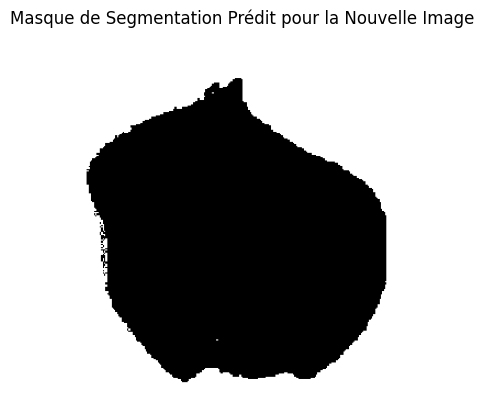

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Confusion Matrix (Image 2):
 [[51158     0     0 ...     0     0   130]
 [    4     0     0 ...     0     0     0]
 [    4     0     0 ...     0     0     5]
 ...
 [    0     0     0 ...     0     0     1]
 [   18     0     0 ...     0     0     0]
 [ 1424     0     0 ...     0     0 59382]]
Rapport de Classification (Image 2) : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     51288
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13      

In [ ]:
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Charger l'image originale
image_path = "/content/drive/MyDrive/Image_clustering (1)/1.bmp"
image = cv.imread(image_path)

# Extraire les caractéristiques dans l'espace RGB
features_rgb = image.reshape(-1, 3)  # Aplatir l'image en un tableau 2D de pixels RGB

# Convertir l'image en espace HSV
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Extraire les caractéristiques dans l'espace HSV
features_hsv = image_hsv.reshape(-1, 3)  # Aplatir l'image en un tableau 2D de pixels HSV

# Concaténer les caractéristiques RGB et HSV dans une variable X
X = np.concatenate((features_rgb, features_hsv), axis=1)

# Charger le masque de segmentation (image de vérité terrain)
mask_path = "/content/drive/MyDrive/Image_clustering (1)/1_GT.bmp"
imageMask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
y = imageMask.ravel()  # Aplatir le masque en 1D

# Vérifier les formes de X et y
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Entraîner le classificateur SVM
clf = svm.SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluation du modèle
conf_matrix = confusion_matrix(y_test, y_pred)
rapport = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print('Rapport de Classification : \n', rapport)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average='macro'))

# Appliquer le modèle entraîné sur une nouvelle image
image_path_2 = "/content/drive/MyDrive/Image_clustering (1)/2.bmp"
new_image = cv.imread(image_path_2)

# Créer les descripteurs pour la nouvelle image (RGB + HSV)
features_rgb_new = new_image.reshape(-1, 3)
image_hsv_new = cv.cvtColor(new_image, cv.COLOR_BGR2HSV)
features_hsv_new = image_hsv_new.reshape(-1, 3)

# Concaténer les descripteurs pour créer le vecteur descripteur Xnew
Xnew = np.concatenate((features_rgb_new, features_hsv_new), axis=1)
print("Dimensions de Xnew:", Xnew.shape)

# Prédictions pour la nouvelle image
y_new = clf.predict(Xnew)

# Reconstruire le masque de segmentation à partir de y_new
mask_new = y_new.reshape(new_image.shape[:2])

# Afficher le masque de segmentation obtenu
plt.imshow(mask_new, cmap='gray')
plt.title("Masque de Segmentation Prédit pour la Nouvelle Image")
plt.axis('off')
plt.show()

# 3.4.5 - Évaluation du modèle avec le masque de vérité terrain pour l'image 2
mask_path_2GT = "/content/drive/MyDrive/Image_clustering (1)/2_GT.bmp"
imageMask_2GT = cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()
y_2GT = imageMask_2GT

# Évaluation finale avec la vérité terrain
conf_matrix_2 = confusion_matrix(y_2GT, y_new)
rapport_2 = classification_report(y_2GT, y_new)
print("Confusion Matrix (Image 2):\n", conf_matrix_2)
print('Rapport de Classification (Image 2) : \n', rapport_2)
print("Accuracy (Image 2): ", metrics.accuracy_score(y_2GT, y_new))
print("Precision (Image 2): ", metrics.precision_score(y_2GT, y_new, average='macro'))
print("Recall (Image 2): ", metrics.recall_score(y_2GT, y_new, average='macro'))
print("F1 Score (Image 2): ", metrics.f1_score(y_2GT, y_new, average='macro'))

Dimensions de l'image (HSV) : (337, 336, 3)


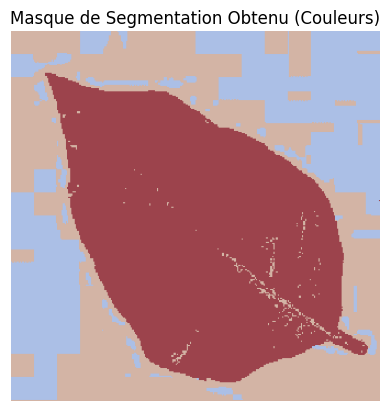

In [ ]:
import cv2 as cv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image en couleur
image_path = "/content/drive/MyDrive/Image_clustering (1)/1.bmp"
image = cv.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and permissions.")
else:
    # Convertir l'image en HSV
    img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    print("Dimensions de l'image (HSV) :", img_hsv.shape)

    # Aplatir l'image en une matrice de caractéristiques: Nx3 (H, S, V)
    img_reshape = img_hsv.reshape((-1, 3))

    # Appliquer K-means
    k = 3
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(img_reshape)
    labels = kmeans.labels_

    # Reconstruire le masque de segmentation 2D
    mask = labels.reshape(img_hsv.shape[:2])  # Garder seulement les dimensions H et W

    # Créer une image colorée pour le masque de segmentation
    colored_mask = np.zeros_like(image)  # Créer une image vide de la même taille que l'image d'origine

    # Assigner des couleurs pour chaque cluster
    for i in range(k):
        colored_mask[mask == i] = np.random.randint(0, 255, size=(3,))  # Couleurs aléatoires

    # Afficher le masque de segmentation coloré
    plt.imshow(cv.cvtColor(colored_mask, cv.COLOR_BGR2RGB))  # Convertir en RGB pour l'affichage
    plt.title('Masque de Segmentation Obtenu (Couleurs)')
    plt.axis('off')
    plt.show()
